Training Accuracy: 1.0
Test Accuracy: 1.0


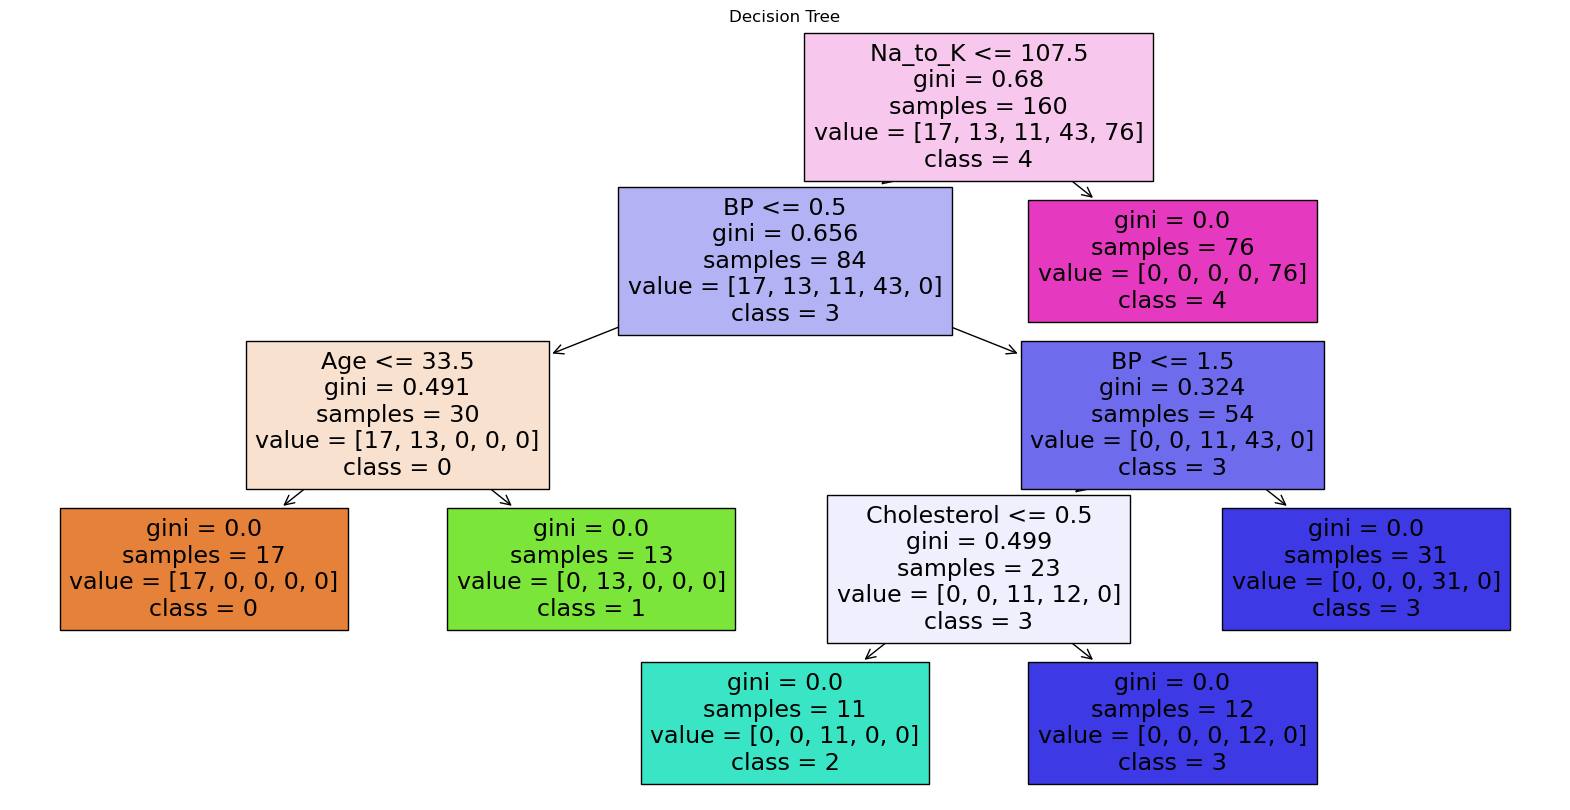

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


data = pd.read_csv('drug200_1722406166375.csv')
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
    
X = data.drop(columns='Drug')
y = data['Drug']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

feature_names = X.columns.tolist() 
class_names = [str(cls) for cls in clf.classes_]

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.title('Decision Tree')
plt.show()


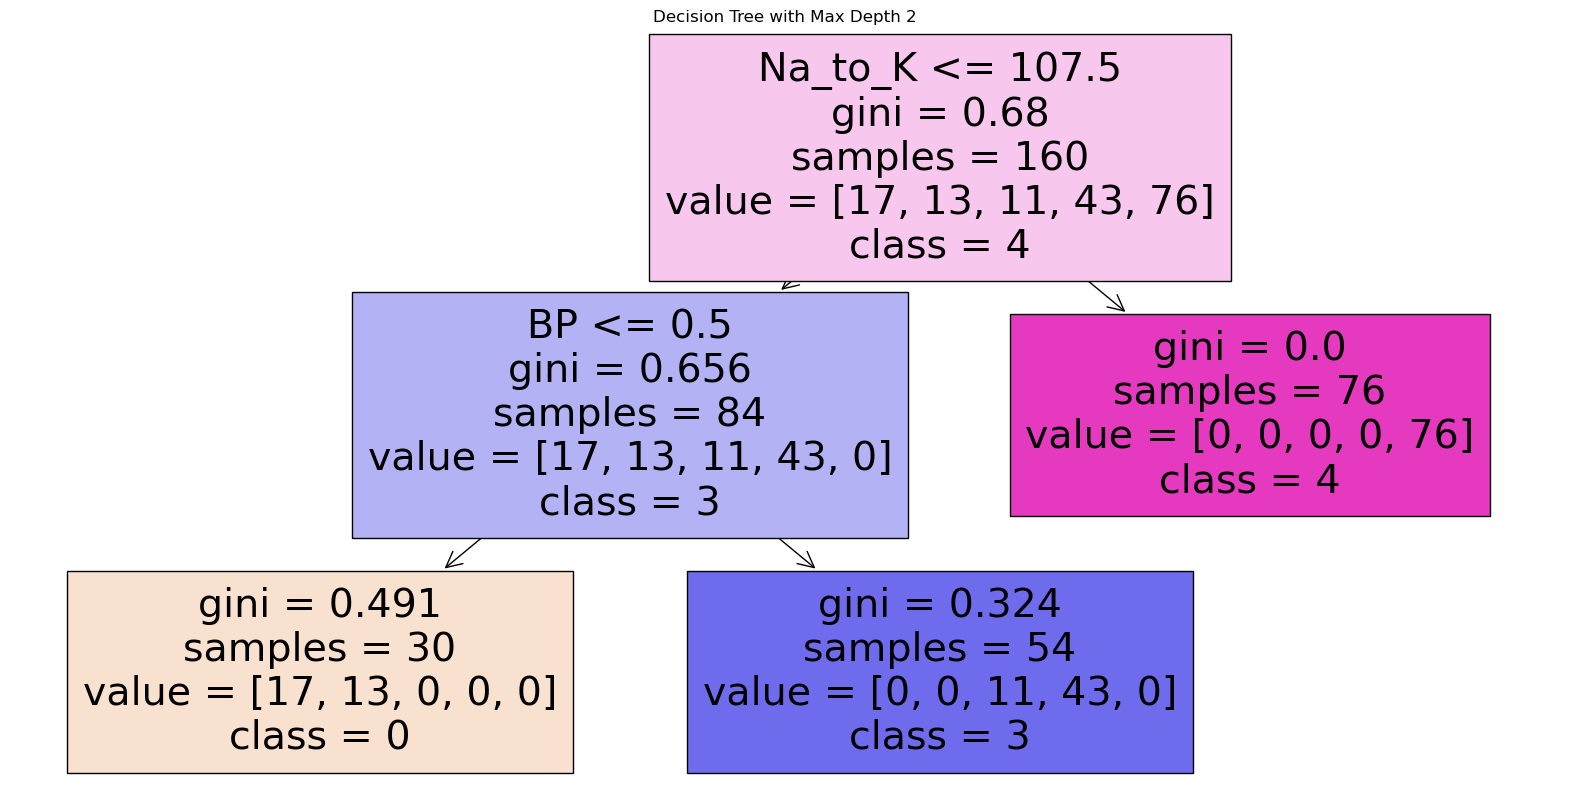

Training Accuracy (Depth 2): 0.85
Test Accuracy (Depth 2): 0.8


In [10]:
clf_b = DecisionTreeClassifier(max_depth=2)
clf_b.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf_b, feature_names=X.columns.tolist(), class_names=[str(cls) for cls in clf_b.classes_], filled=True)
plt.title('Decision Tree with Max Depth 2')
plt.show()

y_train_pred_depth_2 = clf_depth_2.predict(X_train)
y_test_pred_depth_2 = clf_depth_2.predict(X_test)

train_accuracy_depth_2 = accuracy_score(y_train, y_train_pred_depth_2)
test_accuracy_depth_2 = accuracy_score(y_test, y_test_pred_depth_2)

print(f'Training Accuracy (Depth 2): {train_accuracy_depth_2}')
print(f'Test Accuracy (Depth 2): {test_accuracy_depth_2}')

In [ ]:
clf_purity_80 = DecisionTreeClassifier(min_samples_leaf=10)
clf_purity_80.fit(X_train, y_train)

y_train_pred_purity_80 = clf_purity_80.predict(X_train)
y_test_pred_purity_80 = clf_purity_80.predict(X_test)

train_accuracy_purity_80 = accuracy_score(y_train, y_train_pred_purity_80)
test_accuracy_purity_80 = accuracy_score(y_test, y_test_pred_purity_80)

print(f'Training Accuracy (Purity Approx): {train_accuracy_purity_80}')
print(f'Test Accuracy (Purity Approx): {test_accuracy_purity_80}')

In [ ]:
from sklearn.model_selection import cross_val_score
depths = [2, 3, 4]
results = {}

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    results[depth] = scores.mean()
    print(f'Average 10-Fold CV Accuracy for Depth {depth}: {results[depth]}')

best_depth = max(results, key=results.get)
print(f'Best Depth based on 10-Fold CV: {best_depth}')